### KNN Regression으로 50cm 생선의 무게를 예측하기

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [4]:
fish_length

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

#### Train, Test

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(fish_length,fish_weight,random_state=42)

In [4]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

### KNN Regression Model

In [5]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)    # 22장에서 나온 결과에 의해
knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

In [6]:
# 길이가 50cm인 생선의 무게 예측
print(knr.predict([[50]]))
print(knr.predict([[100]]))
print(knr.predict([[1000]]))

[1033.33333333]
[1033.33333333]
[1033.33333333]


> ???

In [7]:
# 기존 데이터로 무게 확인
for i, v in list(enumerate(train_target)):
    if v == train_target.max():
        print(train_input[i],v)

[43.] 1100.0
[42.] 1100.0


In [8]:
# 산점도로 이웃을 구해서 확인하자
import matplotlib.pyplot as plt

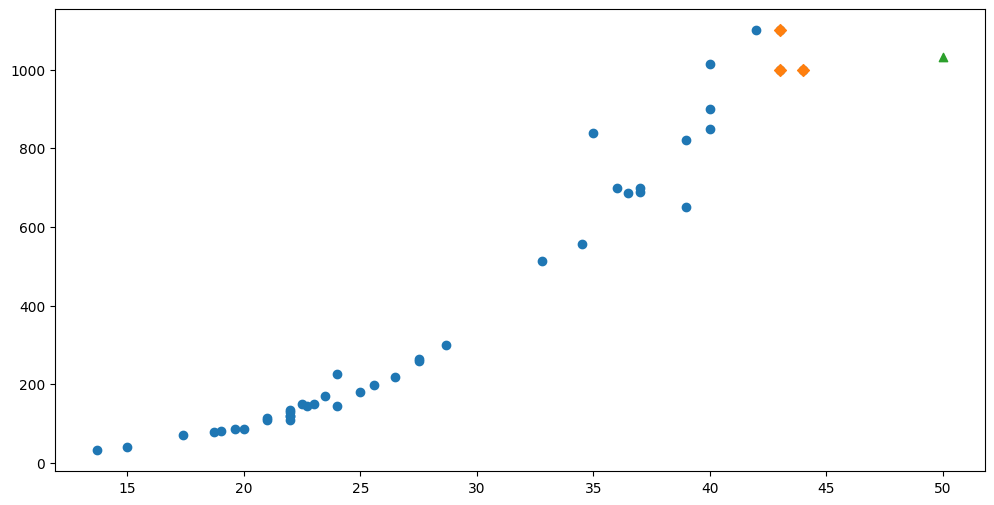

In [9]:
# 50cm 생선의 이웃을 구하자
distance, indexes = knr.kneighbors([[50]])

# 훈련세트의 산점도
plt.figure(figsize=(12,6))
plt.scatter(train_input, train_target)

# 이웃 샘플만 그리기
plt.scatter(train_input[indexes],train_target[indexes],marker='D')

# 50cm 생선 데이터
plt.scatter(50, 1033, marker='^')

plt.show()

In [10]:
# 이웃들의 평균값
np.mean(train_target[indexes])

1033.3333333333333

> KNN은 성능이 좋고 이해하기 쉬운 모델이지만 훈련 세트가 크면 예측이 느려지고 많은 특성을 가진/희소한 데이터셋은 잘 작동하지 않는다.

---
### 선형회귀 (Linear Regression)
: 직선이나 곡선의 함수식(방정식)을 이용하여 구하는 방식으로 로지스틱 회귀분석이나 인공신경망의 기초가 되었다.

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [13]:
lr.predict([[50]])

array([1241.83860323])

In [14]:
# Y=aX+b에서 기울기와 절편값을 출력 (Deep Learning에서는 Weight와 Bias로 불림)
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535474


In [15]:
# 기울기와 절편값으로 계산
39.01714496*50-709.0186449535474

1241.8386030464528

### 산점도 그려보기

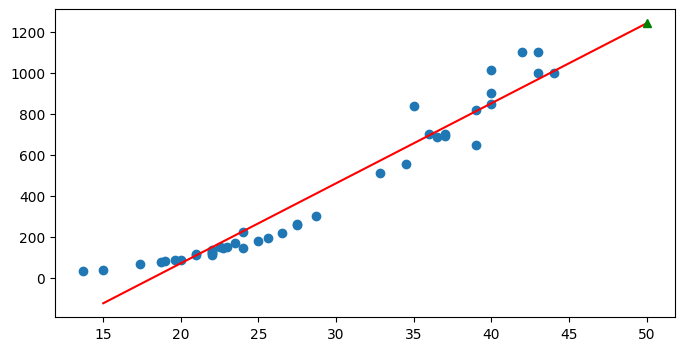

In [16]:
# 훈련세트의 산점도
plt.figure(figsize=(8,4))
plt.scatter(train_input,train_target)

# x: 15에서 50까지 임의로 범위를 잡고 1차 회귀선 그리기
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_],c='red')

# 알고자 하는 50cm 생선을 입력했을 때 마커로 보여주기
plt.plot(50, np.abs(39.01714496*50-709.0186449535474), marker='^', c='green')

plt.show()

> 산점도의 회귀선을 보니 길이가 작아지면 무게가 음수일 경우가 발생할 수 있다. (절편이 음수)

### 과대적합과 과소적합 확인

In [17]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9398463339976041
0.824750312331356


---
### 다항회귀 (!= 다중회귀)
$Y$= $a X^2 $ + $bX $+ $C$
- 항이 여러 개 있고 Feature가 하나인 것을 의미
- Feature가 여러 개인 회귀는 다중회귀라고 한다.

In [18]:
# Feature를 제곱한 Column을 생성하여 기존의 Column에 붙인다.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [19]:
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [20]:
lr = LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression()

In [34]:
# 50cm 생선
lr.predict([[50**2,50]])


array([1573.98423528])

In [35]:
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278338


In [30]:
train_poly[:,0]

array([ 384.16,  484.  ,  349.69,  302.76, 1296.  ,  625.  , 1600.  ,
       1521.  , 1849.  ,  484.  ,  400.  ,  484.  ,  576.  ,  756.25,
       1849.  , 1600.  ,  576.  ,  441.  ,  756.25, 1600.  , 1075.84,
        702.25, 1332.25,  187.69,  515.29,  225.  , 1369.  , 1225.  ,
        823.69,  552.25, 1521.  ,  441.  ,  529.  ,  484.  , 1936.  ,
        506.25,  361.  , 1369.  ,  484.  ,  655.36, 1764.  , 1190.25])

### 산점도 그리기

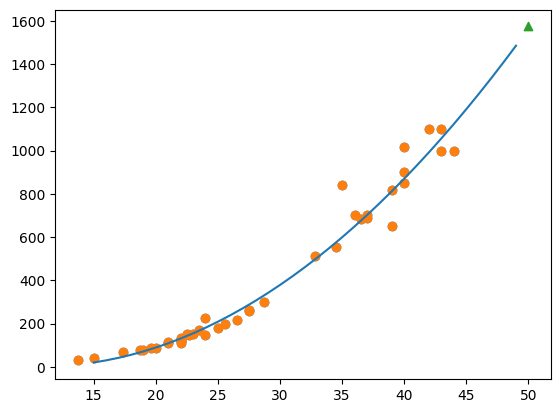

In [37]:
point=np.arange(15,50)
plt.scatter(train_input,train_target)
plt.scatter(train_input,train_target)
plt.plot(point,1.01 *point**2 -21.55*point + 116.05)

plt.scatter([50],[1574],marker='^')
plt.show()